In [1]:
verisure_dict = {'anticipation': 5516,
         'positive': 6898,
         'fear': 1642,
         'trust': 2395,
         'anger': 1068,
         'joy': 762,
         'negative': 618,
         'surprise': 1,
         'disgust': 7}
netatmo_dict= {'trust': 1544,
         'positive': 4675,
         'surprise': 376,
         'anticipation': 3375,
         'fear': 1444,
         'anger': 1822,
         'joy': 1039,
         'negative': 1158,
         'sadness': 111,
         'disgust': 401}
google_dict = {'positive': 8678,
         'anticipation': 7443,
         'trust': 2434,
         'disgust': 712,
         'anger': 3437,
         'negative': 2776,
         'fear': 1507,
         'joy': 2642,
         'surprise': 316,
         'sadness': 97}
emotion=['anticipation','positive','joy','trust','anger','fear','negative','surprise','disgust','sadness']
verisure = [5516,6898,762,2395,1068,1642,618,1,7,0]
netatmo = [3375,4675,1039,1544,1822,1444,1158,376,401,111]
google = [7443,8678,2642,2434,3437,1507,2776,316,712,97]
googlehome = [31761,62181,23778,36215,14385,18009,37142,14113,10956,19529]

In [2]:
import pandas as pd

In [3]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the dataframe
data = {
    'Emotions': ['anticipation', 'positive', 'joy', 'trust', 'anger', 'fear', 'negative', 'surprise', 'disgust', 'sadness'],
    'Verisure': verisure,
    'Netatmo': netatmo,
    'Google Home Nest': google
}
df = pd.DataFrame(data)

# Extract the data into a contingency table
contingency_table = df.iloc[:, 1:].values

# Run the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 3508.4253
P-value: 0.0000
Degrees of freedom: 18
Expected values:
[[4758.94440164 4013.40077665 7561.65482171]
 [5900.17038555 4975.84052455 9374.9890899 ]
 [1294.47716276 1091.68235892 2056.84047832]
 [1856.78662126 1565.89954387 2950.31383487]
 [1843.38442691 1554.59695812 2929.01861497]
 [1338.17997041 1128.53861682 2126.28141277]
 [1326.23453632 1118.464573   2107.30089068]
 [ 201.90697137  170.27591149  320.81711714]
 [ 326.31429716  275.1933923   518.49231054]
 [  60.60122662   51.10734428   96.2914291 ]]


Finding the ratio of positive sentiments to negative sentiments

In [5]:
verisure_pos = [5516,6898,762,2395]
netatmo_pos = [3375,4675,1039,1544]
google_pos = [7443,8678,2642,2434]
verisure_neg = [1068,1642,618,1,7,0]
netatmo_neg = [1822,1444,1158,376,401,111]
google_neg = [3437,1507,2776,316,712,97]
emo_pos = ['anticipation','positive','joy','trust']
emo_neg = ['anger','fear','negative','surprise','disgust','sadness']

data_pos = {
    'Emotions': emo_pos,
    'Verisure': verisure_pos,
    'Netatmo': netatmo_pos,
    'Google Home Nest': google_pos
}

data_neg = {
    'Emotions': emo_neg,
    'Verisure': verisure_neg,
    'Netatmo': netatmo_neg,
    'Google Home Nest': google_neg
}
dataset_pos = pd.DataFrame(data_pos)
dataset_neg = pd.DataFrame(data_neg)

In [8]:
print(dataset_pos['Verisure'].sum()/dataset_neg['Verisure'].sum())
print(dataset_pos['Netatmo'].sum()/dataset_neg['Netatmo'].sum())
print(dataset_pos['Google Home Nest'].sum()/dataset_neg['Google Home Nest'].sum())

4.667565947242206
2.0016942771084336
2.3964951950254383


Creating graphs of performance over time for temporal analysis

In [21]:
timegraph = pd.read_excel('Verisure Latest.xlsx')

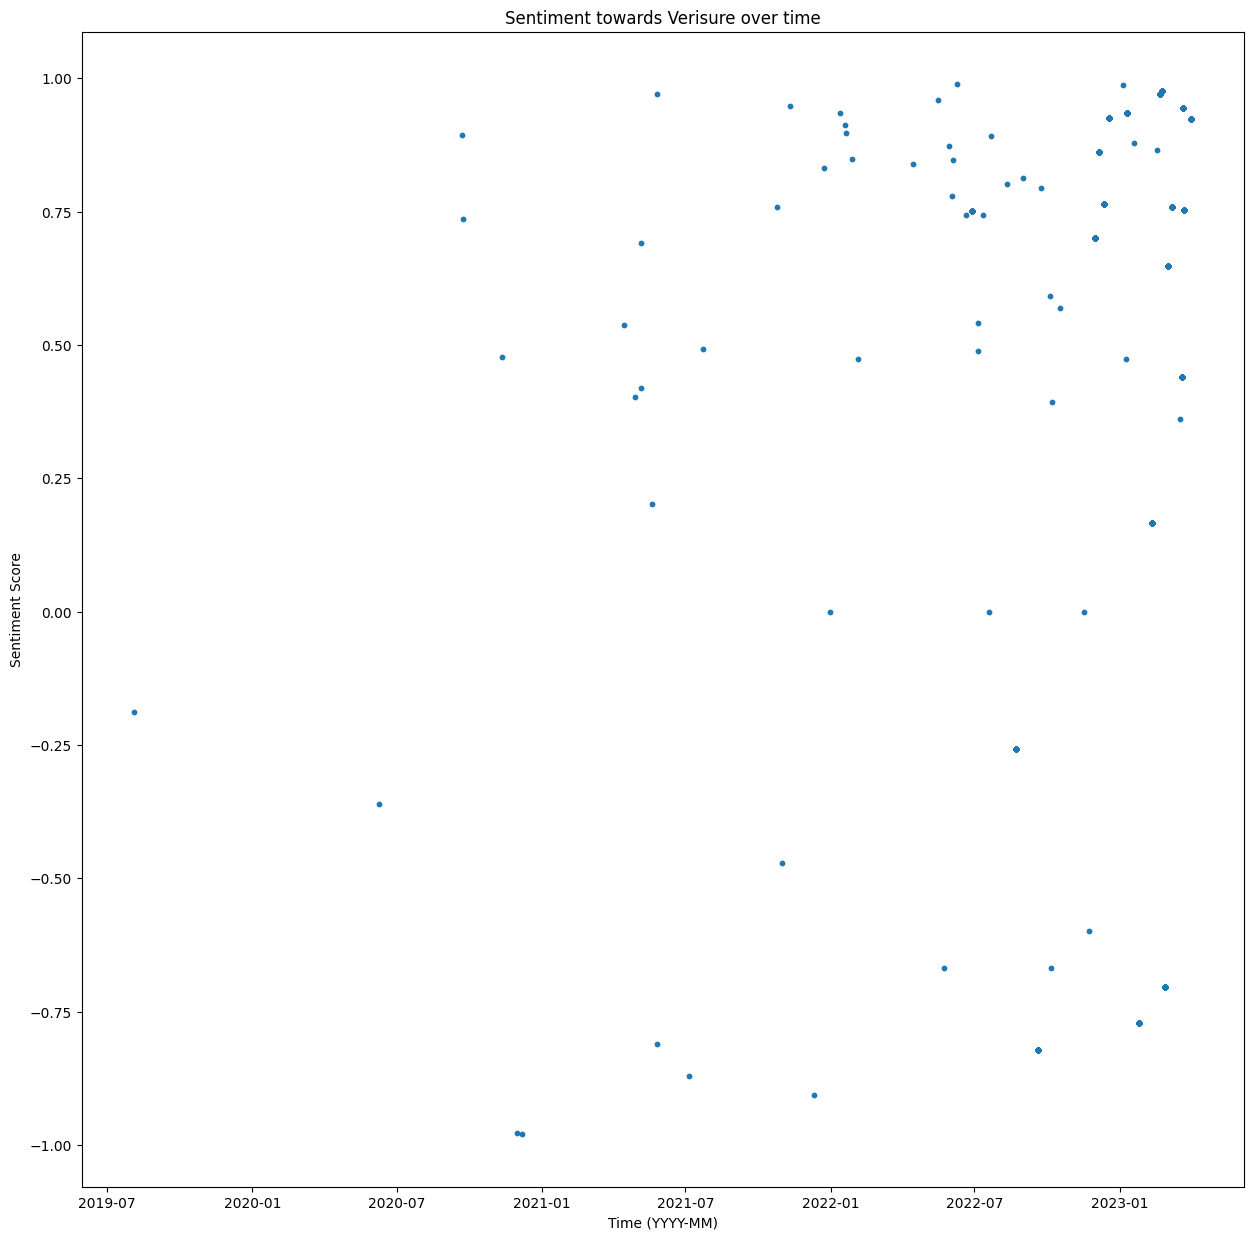

In [23]:
import matplotlib.pyplot as plt
x_axis = timegraph['Date']
y_axis = timegraph['Sentiment Score']
plt.figure(figsize=(15, 15))
plt.scatter(x_axis, y_axis, s = 10)
plt.title('Sentiment towards Verisure over time')
plt.xlabel('Time (YYYY-MM)')
plt.ylabel('Sentiment Score')
plt.show() 